In [ ]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder, LabelBinarizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.layers import Dense, Conv1D, MaxPool1D, Flatten, Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
feature=["duration","protocol_type","service","flag","src_bytes","dst_bytes","land","wrong_fragment","urgent","hot",
          "num_failed_logins","logged_in","num_compromised","root_shell","su_attempted","num_root","num_file_creations","num_shells",
          "num_access_files","num_outbound_cmds","is_host_login","is_guest_login","count","srv_count","serror_rate","srv_serror_rate",
          "rerror_rate","srv_rerror_rate","same_srv_rate","diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
          "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate","dst_host_srv_diff_host_rate","dst_host_serror_rate",
          "dst_host_srv_serror_rate","dst_host_rerror_rate","dst_host_srv_rerror_rate","label","difficulty"]

# **Training**

In [ ]:
data = pd.read_csv('KDDTrain+.txt', names=feature)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [ ]:
data.drop(['difficulty'], axis=1, inplace=True)
data.shape

(125973, 42)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,125973.0,287.144650,2.604515e+03,0.0,0.00,0.00,0.00,4.290800e+04
src_bytes,125973.0,45566.743000,5.870331e+06,0.0,0.00,44.00,276.00,1.379964e+09
dst_bytes,125973.0,19779.114421,4.021269e+06,0.0,0.00,0.00,516.00,1.309937e+09
land,125973.0,0.000198,1.408607e-02,0.0,0.00,0.00,0.00,1.000000e+00
wrong_fragment,125973.0,0.022687,2.535300e-01,0.0,0.00,0.00,0.00,3.000000e+00
urgent,125973.0,0.000111,1.436603e-02,0.0,0.00,0.00,0.00,3.000000e+00
hot,125973.0,0.204409,2.149968e+00,0.0,0.00,0.00,0.00,7.700000e+01
num_failed_logins,125973.0,0.001222,4.523914e-02,0.0,0.00,0.00,0.00,5.000000e+00
logged_in,125973.0,0.395736,4.890101e-01,0.0,0.00,0.00,1.00,1.000000e+00
num_compromised,125973.0,0.279250,2.394204e+01,0.0,0.00,0.00,0.00,7.479000e+03


In [ ]:
data['label'].value_counts()

,count
label,
normal,67343
neptune,41214
satan,3633
ipsweep,3599
portsweep,2931
smurf,2646
nmap,1493
back,956
teardrop,892


In [ ]:
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [ ]:
change_label(data)
data.label.value_counts()

<ipython-input-13-aa797d4211a9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)


,count
label,
normal,67343
Dos,45927
Probe,11656
R2L,995
U2R,52


In [ ]:
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

numeric_col = data.select_dtypes(include='number').columns
data = standardization(data,numeric_col)

In [ ]:
le = LabelEncoder()
data['label'] = le.fit_transform(data['label'])
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110249,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.818890,-0.782367,-0.280282,0.069972,-0.289103,-0.639532,-0.624871,-0.224532,-0.376387,4
1,-0.110249,udp,other,SF,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-1.035688,-1.161030,2.736852,2.367737,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,4
2,-0.110249,tcp,private,S0,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,...,-0.809857,-0.938287,-0.174417,-0.480197,-0.289103,1.608759,1.618955,-0.387635,-0.376387,0
3,-0.110249,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.383108,0.066252,-0.572083,-0.602433,-0.387635,-0.345084,4
4,-0.110249,tcp,http,SF,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,...,1.258754,1.066401,-0.439078,-0.480197,-0.289103,-0.639532,-0.624871,-0.387635,-0.376387,4


In [ ]:
label_mapping = dict(enumerate(le.classes_))
print("Label Mapping:", label_mapping)

Label Mapping: {0: 'Dos', 1: 'Probe', 2: 'R2L', 3: 'U2R', 4: 'normal'}


In [ ]:
data = pd.get_dummies(data, columns=['protocol_type','service','flag'],prefix="",prefix_sep="")
data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,-0.110249,-0.007679,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,False,False,False,False,False,False,False,False,True,False
1,-0.110249,-0.007737,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,False,False,False,False,False,False,False,False,True,False
2,-0.110249,-0.007762,-0.004919,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,-0.809262,-0.011664,...,False,False,False,False,True,False,False,False,False,False
3,-0.110249,-0.007723,-0.002891,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,False,False,False,False,False,False,False,False,True,False
4,-0.110249,-0.007728,-0.004814,-0.014089,-0.089486,-0.007736,-0.095076,-0.027023,1.235694,-0.011664,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
x = data.drop(['label'], axis=1)
y = data['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, random_state = 42, test_size = 0.2)

In [ ]:
le2 = LabelBinarizer()
y_train = le2.fit_transform(y_train)
y_val = le2.fit_transform(y_val)
y_train

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0]])

In [ ]:
model = tf.keras.Sequential()

model.add(Conv1D(32, 3, padding="same",input_shape = (x_train.shape[1], 1), activation='relu'))
model.add(MaxPool1D(pool_size=(4)))
model.add(Dropout(0.2))
model.add(Conv1D(32, 3, padding="same", activation='relu'))
model.add(MaxPool1D(pool_size=(4)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=50))

model.add(Dense(units=5,activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 122, 32)             │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 30, 32)              │           3,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 7, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 224)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │          11,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             255 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,737 (57.57 KB)

 Trainable params: 14,737 (57.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, epochs=40, batch_size=5000, validation_data = (x_val, y_val))

Epoch 1/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 510ms/step - accuracy: 0.5000 - loss: 1.3333 - val_accuracy: 0.8346 - val_loss: 0.6733
Epoch 2/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 620ms/step - accuracy: 0.8308 - loss: 0.6375 - val_accuracy: 0.8878 - val_loss: 0.4013
Epoch 3/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 20s 564ms/step - accuracy: 0.8807 - loss: 0.4169 - val_accuracy: 0.9159 - val_loss: 0.3051
Epoch 4/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 590ms/step - accuracy: 0.8993 - loss: 0.3406 - val_accuracy: 0.9336 - val_loss: 0.2616
Epoch 5/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 621ms/step - accuracy: 0.9112 - loss: 0.3090 - val_accuracy: 0.9401 - val_loss: 0.2297
Epoch 6/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 520ms/step - accuracy: 0.9194 - loss: 0.2735 - val_accuracy: 0.9429 - val_loss: 0.2086
Epoch 7/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 634ms/step - accuracy: 0.9264 - loss: 0.2522 - val_accuracy: 0.9472 - val_loss: 0.1941
Epoch 8/40
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 500ms/step - accuracy: 0.9325 - loss: 0.2328 - val_accu

In [ ]:
model.evaluate(x_test, y_test)

788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3660 - loss: 73.4781


[73.52296447753906, 0.36658066511154175]

In [ ]:
y_pred = model.predict(x_test)

788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([4, 0, 0, ..., 4, 4, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9181
           1       0.96      0.94      0.95      2357
           2       0.20      0.01      0.02       224
           3       0.50      0.09      0.15        11
           4       0.97      0.99      0.98     13422

    accuracy                           0.98     25195
   macro avg       0.72      0.60      0.62     25195
weighted avg       0.97      0.98      0.97     25195

Confusion Matrix:
[[ 9100    37     0     0    44]
 [   51  2208     1     0    97]
 [    0     0     2     0   222]
 [    0     0     1     1     9]
 [   85    61     6     1 13269]]


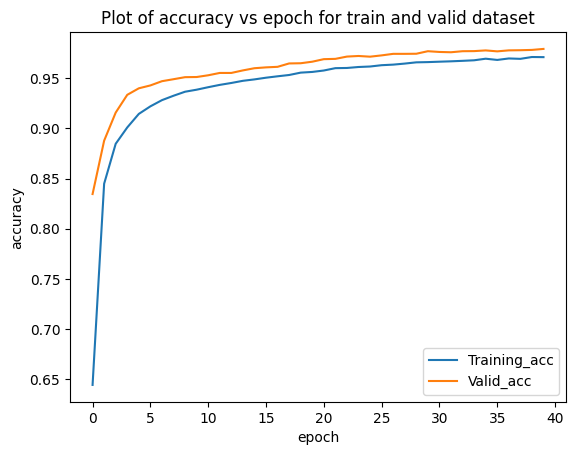

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Plot of accuracy vs epoch for train and valid dataset")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Training_acc', 'Valid_acc'], loc = 'lower right')
plt.show()

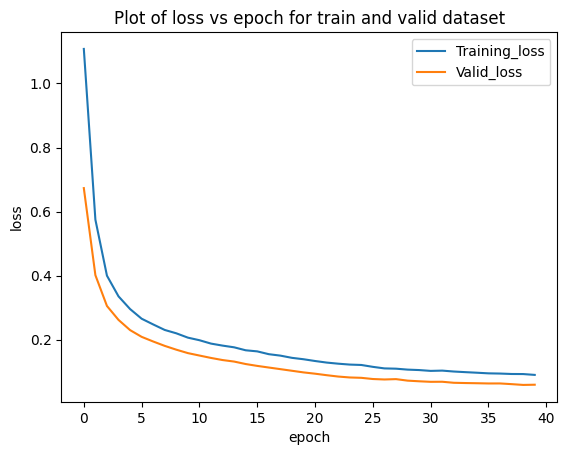

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Plot of loss vs epoch for train and valid dataset")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Training_loss', 'Valid_loss'], loc='upper right')
plt.show()

In [ ]:
from joblib import dump, load

# Saving the model
dump(model, 'model_new.joblib')


['/content/drive/MyDrive/Colab Notebooks/AI3443/model_new.joblib']

# **Testing**

In [ ]:
test_data = pd.read_csv('KDDTest+.txt', names=feature)
test_data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [ ]:
test_data.drop(['difficulty'], axis=1, inplace=True)
test_data.shape

(22544, 42)

In [ ]:
def change_label(df):
  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)
  df.label.replace(['ftp_write','guess_passwd','httptunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xlock','xsnoop'],'R2L',inplace=True)
  df.label.replace(['ipsweep','mscan','nmap','portsweep','saint','satan'],'Probe',inplace=True)
  df.label.replace(['buffer_overflow','loadmodule','perl','ps','rootkit','sqlattack','xterm'],'U2R',inplace=True)

In [ ]:
change_label(test_data)
test_data.label.value_counts()

<ipython-input-21-aa797d4211a9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.label.replace(['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm'],'Dos',inplace=True)


,count
label,
normal,9711
Dos,7460
R2L,2885
Probe,2421
U2R,67


In [ ]:
std_scaler = StandardScaler()
def standardization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df

numeric_col = test_data.select_dtypes(include='number').columns
test_data = standardization(test_data,numeric_col)

In [ ]:
le = LabelEncoder()
test_data['label'] = le.fit_transform(test_data['label'])
test_data = pd.get_dummies(test_data, columns=['protocol_type','service','flag'],prefix="",prefix_sep="")
test_data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,SF,SH
0,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,True,False,False,False,False,False,False,False,False,False
1,-0.155534,-0.021988,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,True,False,False,False,False,False,False,False,False,False
2,-0.154113,0.005473,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,False,False,False,False,False,False,False,False,True,False
3,-0.155534,-0.021946,-0.096896,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,False,False,False,False,False,False,False,False,True,False
4,-0.154823,-0.021988,-0.096189,-0.017624,-0.059104,-0.019459,-0.113521,-0.143999,-0.890373,-0.016494,...,False,True,False,False,False,False,False,False,False,False


In [ ]:
data, test_data = data.align(test_data, join='outer', axis=1, fill_value=0)
print(data.shape)
print(test_data.shape)

(125973, 123)
(22544, 123)


In [ ]:
test_data

,IRC,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,...,time,udp,urgent,urh_i,urp_i,uucp,uucp_path,vmnet,whois,wrong_fragment
0,False,False,True,False,False,False,False,False,False,False,...,False,False,-0.019459,0,False,False,False,False,False,-0.059104
1,False,False,True,False,False,False,False,False,False,False,...,False,False,-0.019459,0,False,False,False,False,False,-0.059104
2,False,False,False,False,False,False,False,False,False,False,...,False,False,-0.019459,0,False,False,False,False,False,-0.059104
3,False,False,False,False,False,False,False,False,False,False,...,False,False,-0.019459,0,False,False,False,False,False,-0.059104
4,False,False,False,True,False,False,False,False,False,False,...,False,False,-0.019459,0,False,False,False,False,False,-0.059104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,False,False,False,False,False,False,False,False,False,False,...,False,False,-0.019459,0,False,False,False,False,False,-0.059104
22540,False,False,False,False,False,False,False,False,False,False,...,False,False,-0.019459,0,False,False,False,False,False,-0.059104
22541,False,False,False,False,False,False,False,False,False,False,...,False,False,-0.019459,0,False,False,False,False,False,-0.059104
22542,False,False,False,False,False,False,False,False,False,False,...,False,True,-0.019459,0,False,False,False,False,False,-0.059104


In [ ]:
data

,IRC,OTH,REJ,RSTO,RSTOS0,RSTR,S0,S1,S2,S3,...,time,udp,urgent,urh_i,urp_i,uucp,uucp_path,vmnet,whois,wrong_fragment
0,False,False,False,False,False,False,False,False,False,False,...,False,False,-0.007736,False,False,False,False,False,False,-0.089486
1,False,False,False,False,False,False,False,False,False,False,...,False,True,-0.007736,False,False,False,False,False,False,-0.089486
2,False,False,False,False,False,False,True,False,False,False,...,False,False,-0.007736,False,False,False,False,False,False,-0.089486
3,False,False,False,False,False,False,False,False,False,False,...,False,False,-0.007736,False,False,False,False,False,False,-0.089486
4,False,False,False,False,False,False,False,False,False,False,...,False,False,-0.007736,False,False,False,False,False,False,-0.089486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,False,False,False,False,False,False,True,False,False,False,...,False,False,-0.007736,False,False,False,False,False,False,-0.089486
125969,False,False,False,False,False,False,False,False,False,False,...,False,True,-0.007736,False,False,False,False,False,False,-0.089486
125970,False,False,False,False,False,False,False,False,False,False,...,False,False,-0.007736,False,False,False,False,False,False,-0.089486
125971,False,False,False,False,False,False,True,False,False,False,...,False,False,-0.007736,False,False,False,False,False,False,-0.089486


In [ ]:
test_data.to_csv('trafficTest.csv', index=False)

In [ ]:
y_pred2 = model.predict(xt)
y_pred2 = np.argmax(y_pred2, axis=1)
y_pred2

705/705 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step


array([0, 0, 4, ..., 0, 4, 1])